<h1> Extracting pre-trained convolutions from deep learning networks: Resnet50</h1>
    ...explain what you have done here...

In [1]:
import numpy as np
import components.utils.utils as u
import components.utils.tf_utils as tfu

from keras.applications.resnet50 import ResNet50
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


Step 1: loading the pre-trained model
Explain what you do here

In [2]:
model = ResNet50()
model.summary()

102858752/102853048 [==============================] - 10s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
_______________________

Step 2 - Extracting the first convolutional layers
Explain what you do here

{'name': 'conv1', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': (7, 7), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'normal', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


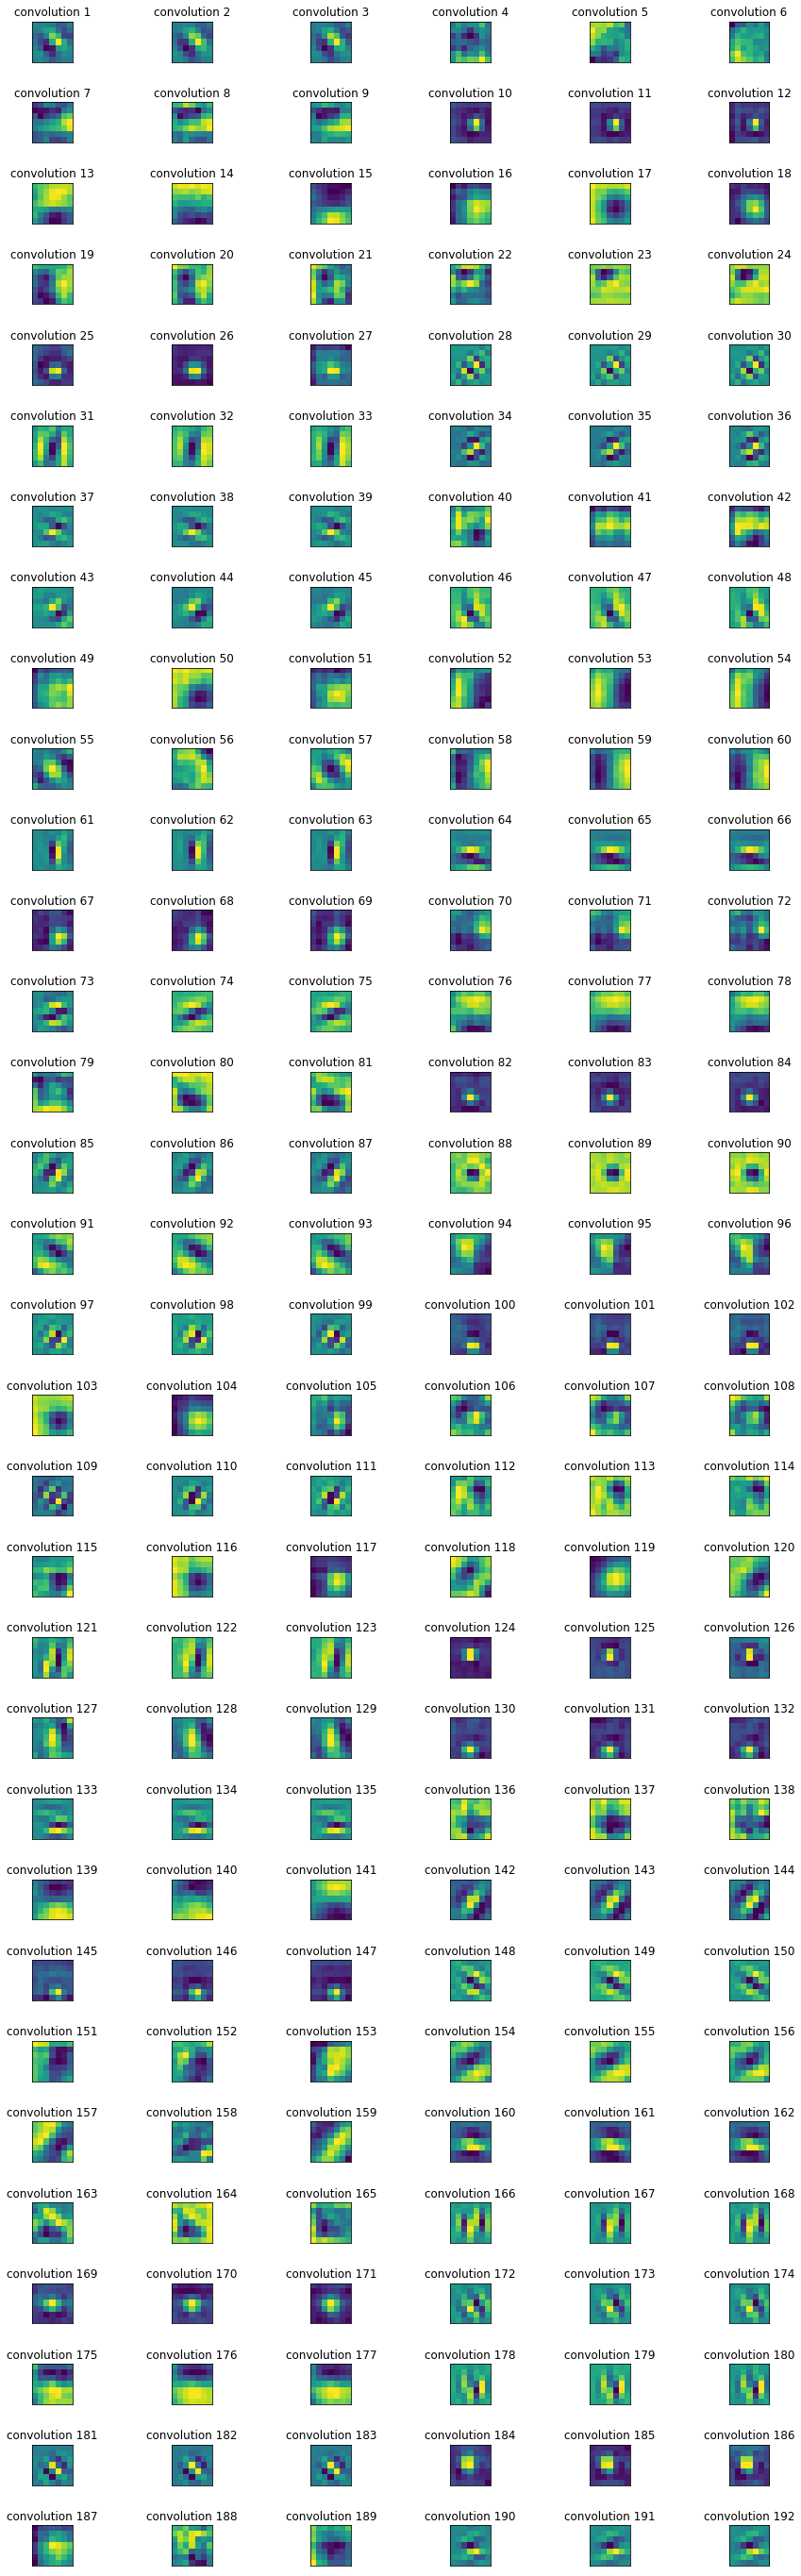

In [3]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_name = 'conv1'
layer = layer_dict[layer_name]
layer.padding="same"
layer.strides = (1,1)
print(layer.get_config())
tfu.print_conv_layer_filters(layer)

Step 3 : building a simple model using the extracted feature maps on an input image

(375, 450, 3)


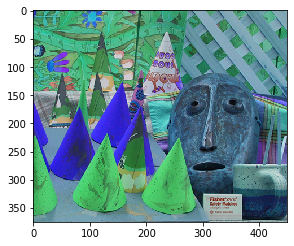

In [4]:
import cv2
im2 = cv2.imread("./datasets/middlebury_2003/cones/im2.ppm")
plt.figure(figsize = [10,10])
plt.subplot(121)
plt.imshow(im2)
print(im2.shape)

In [5]:
model = tfu.get_model(im2, layer_dict[layer_name])
im2 = im2.reshape(1, im2.shape[0], im2.shape[1], im2.shape[2])
processed = model.predict(im2)
print(processed.shape)

(1, 375, 450, 64)


In [6]:
processed_squeezed = np.squeeze(processed)
print(processed_squeezed.shape)
processed_reshaped = np.moveaxis(processed_squeezed, 2,0)

(375, 450, 64)


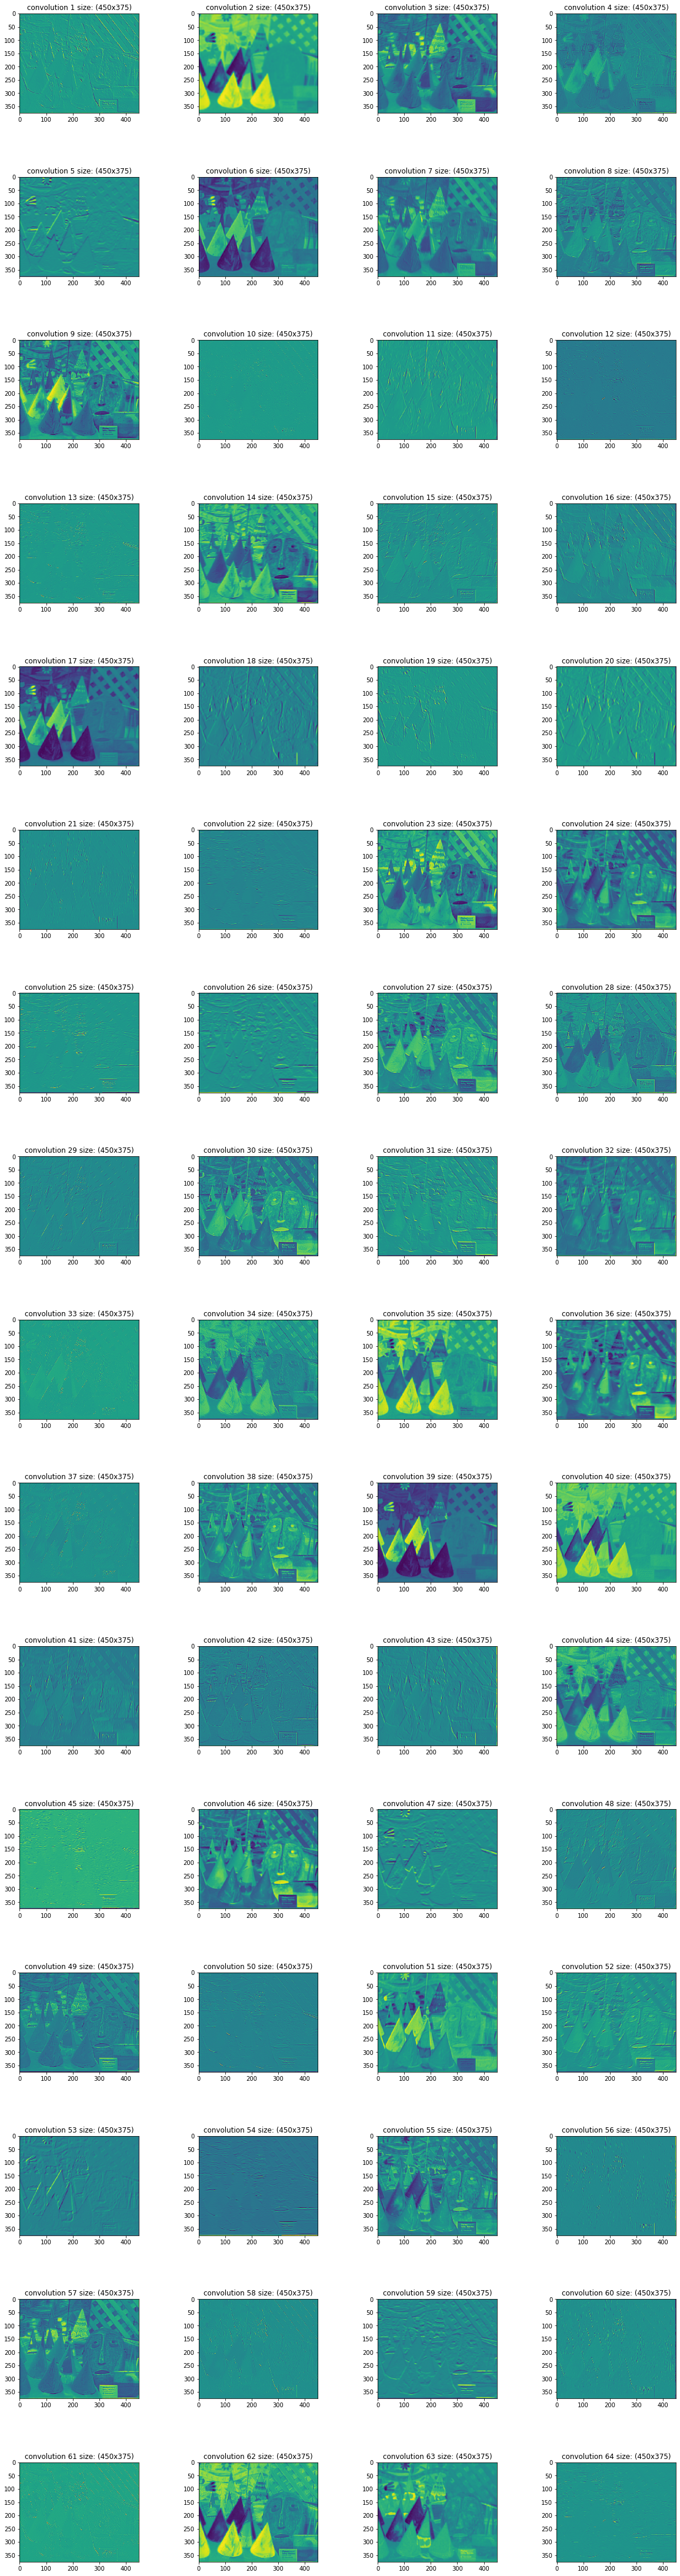

In [7]:
u.plotNImages2(processed_reshaped, cMode = "viridis")